In [1]:
#Data Manipulation
import pandas as pd
import numpy as np

#Data Splitting
from sklearn.model_selection import train_test_split

#Imputing Missing Values
from sklearn.impute import SimpleImputer

#One Hot Encoding
from sklearn.preprocessing import OneHotEncoder as onehot

#Scaling Numeric Data
from sklearn.preprocessing import StandardScaler

#Label Encoder
from sklearn.preprocessing import LabelEncoder

#Column Transformer
from sklearn.compose import ColumnTransformer

#PipeLine
from sklearn.pipeline import Pipeline

#Estimator
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Plotting the Pipeline
from sklearn import set_config

#Visualisation
import seaborn as sns

#Logistic Regression
from sklearn.linear_model import LogisticRegression

#Grid Search
from sklearn.model_selection import GridSearchCV

#Warning Handling
import warnings
warnings.filterwarnings("ignore")

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Measuring Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Matplotlib
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
train_df = pd.read_csv("C:/Users/chira/Desktop/BDDA Assignment/Back_order_train.csv")
test_df = pd.read_csv("C:/Users/chira/Desktop/BDDA Assignment/Back_order_test.csv")
data=pd.read_csv("C:/Users/chira/Desktop/BDDA Assignment/Back_order_train.csv")

# DATA EXPLORATION


In [4]:
train_df.shape

(1687861, 23)

In [5]:
test_df.shape

(242076, 23)

In [6]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [7]:
test_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [8]:
train_df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [9]:
test_df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,2.420750e+05,227351.000000,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,242075.000000,2.420750e+05,2.420750e+05,2.420750e+05,242075.000000,242075.000000,242075.000000,242075.000000,242075.000000
mean,4.997510e+02,7.923018,36.178213,1.814723e+02,3.488073e+02,5.082963e+02,51.478195,1.721393e+02,3.404254e+02,5.117754e+02,52.804693,1.824236,-7.093779,-6.632445,0.843726
std,2.928039e+04,7.041410,898.673127,5.648875e+03,1.008180e+04,1.410972e+04,1544.678350,5.164244e+03,9.386523e+03,1.397670e+04,1278.591177,178.679263,26.900636,26.160720,45.606626
min,-2.541400e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-99.000000,-99.000000,0.000000
25%,4.000000e+00,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.630000,0.660000,0.000000
50%,1.500000e+01,8.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,2.000000e+00,4.000000e+00,0.000000,0.000000,0.820000,0.810000,0.000000
75%,8.100000e+01,9.000000,0.000000,4.000000e+00,1.200000e+01,2.000000e+01,4.000000,1.400000e+01,3.000000e+01,4.600000e+01,3.000000,0.000000,0.960000,0.950000,0.000000
max,1.214579e+07,52.000000,265272.000000,1.510592e+06,2.157024e+06,3.162260e+06,349620.000000,1.099852e+06,2.103389e+06,3.195211e+06,303713.000000,79964.000000,1.000000,1.000000,6232.000000


In [10]:
train_df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [11]:
train_df.nunique()

sku                  1687861
national_inv           14969
lead_time                 32
in_transit_qty          5230
forecast_3_month        7825
forecast_6_month       11114
forecast_9_month       13662
sales_1_month           5764
sales_3_month          10495
sales_6_month          14818
sales_9_month          18341
min_bank                5568
potential_issue            2
pieces_past_due          826
perf_6_month_avg         102
perf_12_month_avg        102
local_bo_qty             654
deck_risk                  2
oe_constraint              2
ppap_risk                  2
stop_auto_buy              2
rev_stop                   2
went_on_backorder          2
dtype: int64

In [12]:
test_df.nunique()

sku                  242076
national_inv           6579
lead_time                32
in_transit_qty         1990
forecast_3_month       3239
forecast_6_month       4439
forecast_9_month       5389
sales_1_month          2163
sales_3_month          4055
sales_6_month          5710
sales_9_month          6996
min_bank               2200
potential_issue           2
pieces_past_due         324
perf_6_month_avg        102
perf_12_month_avg       102
local_bo_qty            250
deck_risk                 2
oe_constraint             2
ppap_risk                 2
stop_auto_buy             2
rev_stop                  2
went_on_backorder         2
dtype: int64

In [13]:
test_target_df = test_df["went_on_backorder"]

In [14]:
test_df.drop(["went_on_backorder"], axis='columns', inplace=True)

In [15]:
test_target_df = pd.DataFrame(test_target_df)

In [16]:
test_target_df

,went_on_backorder
0,No
1,No
2,No
3,No
4,No
...,...
242071,No
242072,No
242073,No
242074,No


In [17]:
test_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,88.0,4.0,No,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No


# Visualisation


In [18]:
data

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


Plotting correlation matrix

<AxesSubplot:>

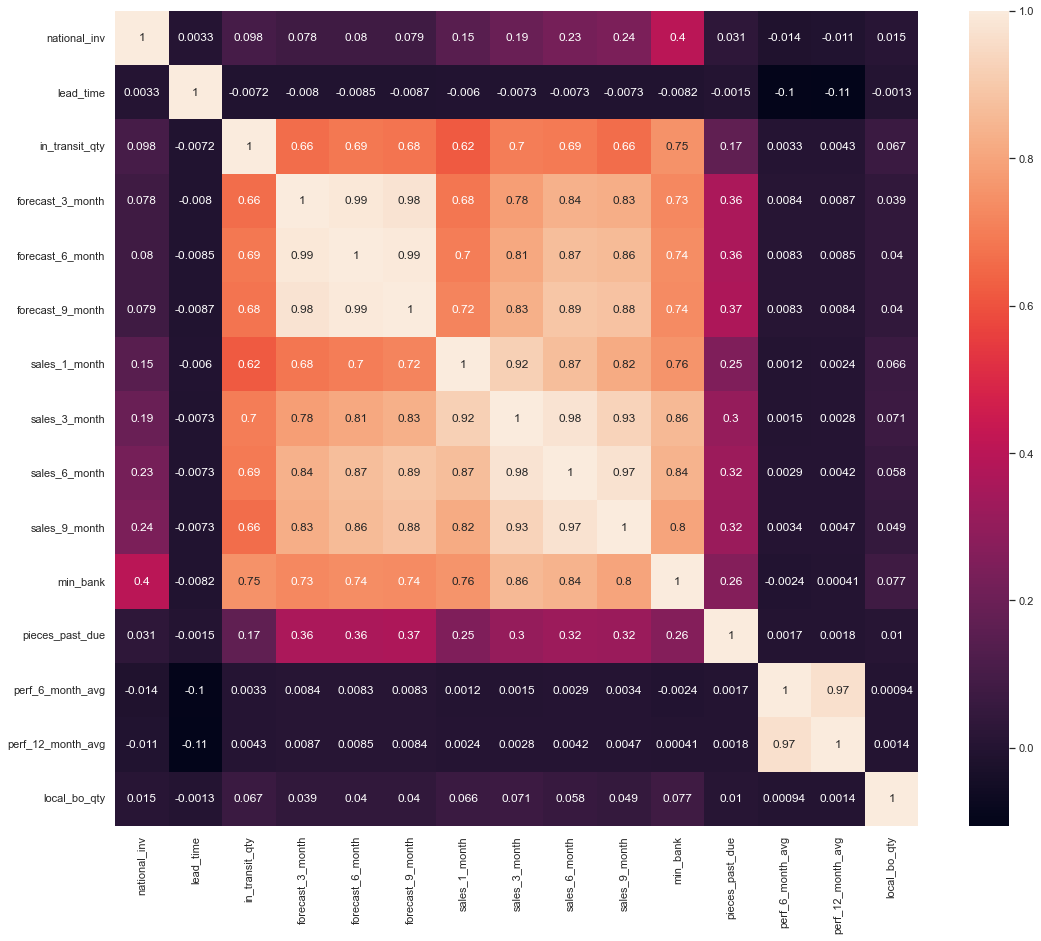

In [19]:
cor = data.corr()
sns.set(rc={'figure.figsize':(18,15)})
# plot the heatmap
sns.heatmap(cor, 
        xticklabels=cor.columns,
        yticklabels=cor.columns,annot = True)

<AxesSubplot:xlabel='forecast_3_month', ylabel='sales_3_month'>

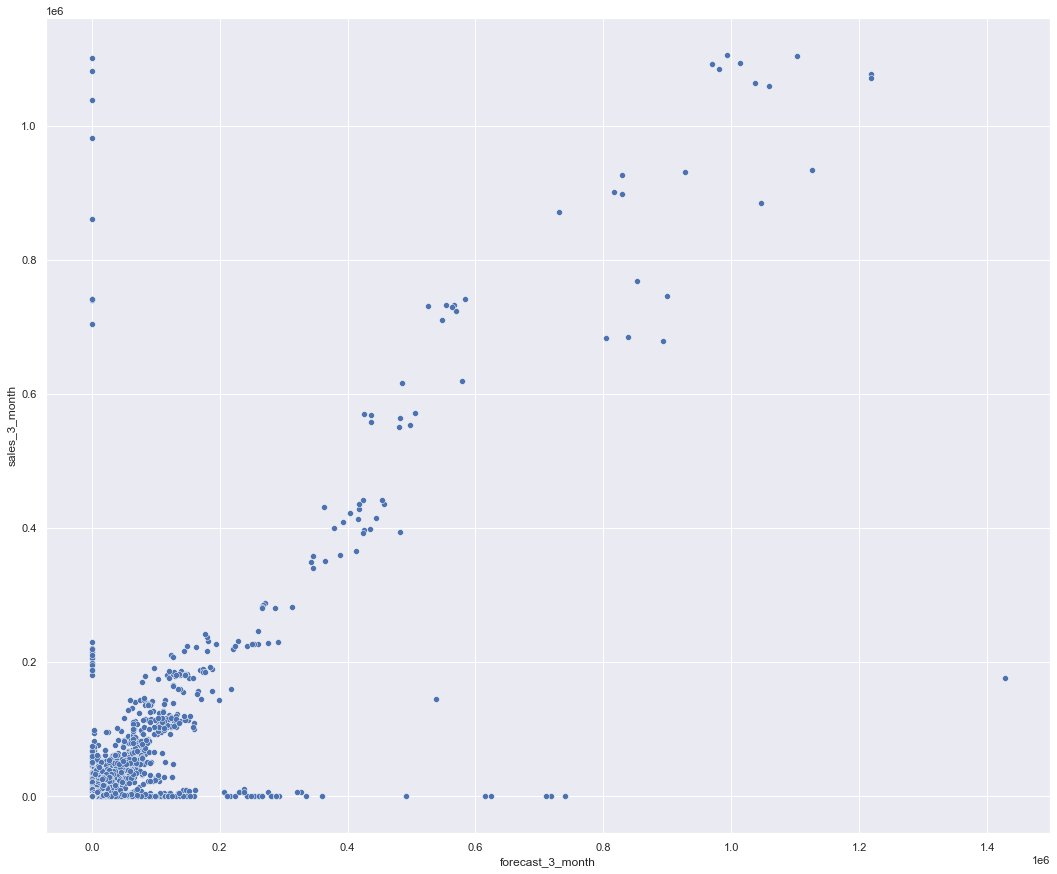

In [20]:
sns.scatterplot(data=data, x="forecast_3_month", y="sales_3_month")

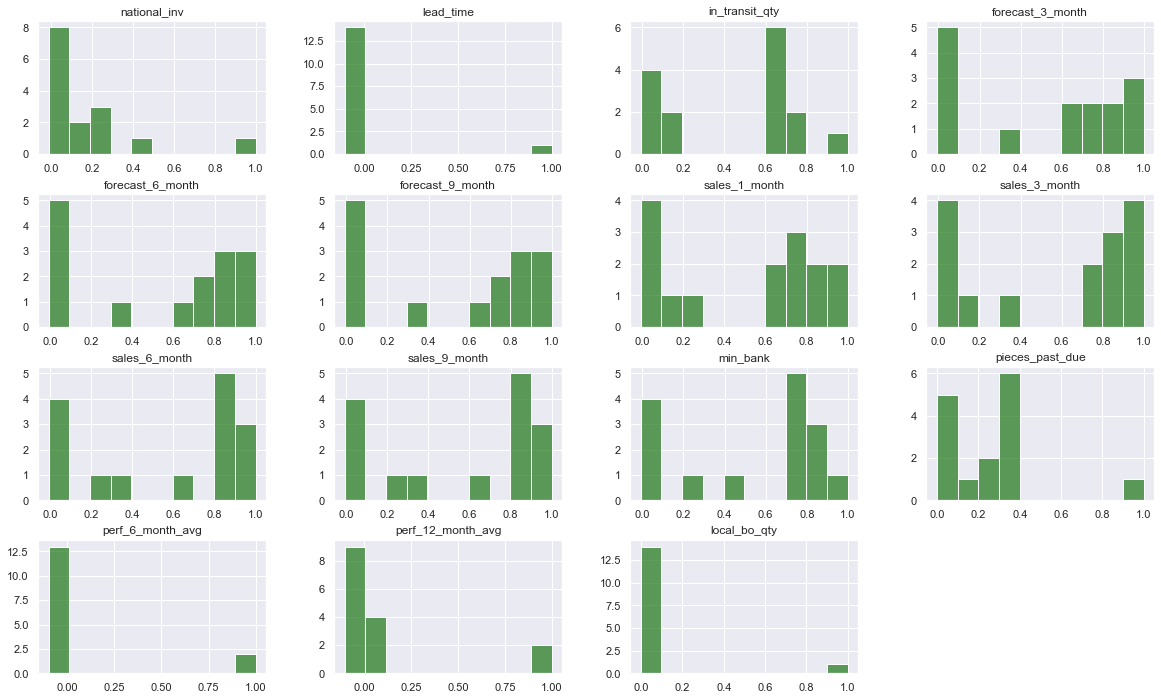

In [21]:
cor.hist(figsize=(20,12), color="#107009AA")
plt.show()

<Figure size 648x576 with 0 Axes>

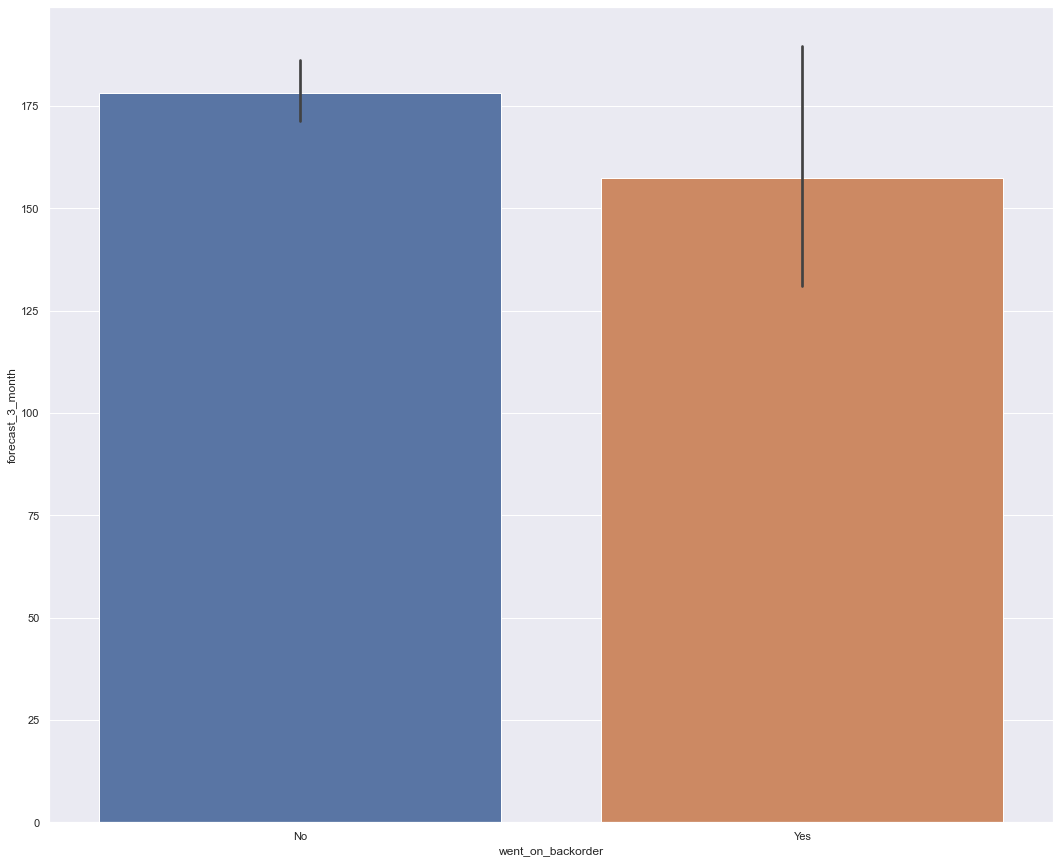

<Figure size 648x576 with 0 Axes>

In [22]:
ax = sns.barplot(x="went_on_backorder", y="forecast_3_month", data=data)
plt.figure(figsize=(9, 8))

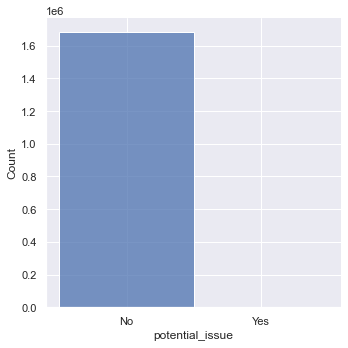

In [23]:
sns.displot(data, x="potential_issue")

<Figure size 648x576 with 0 Axes>

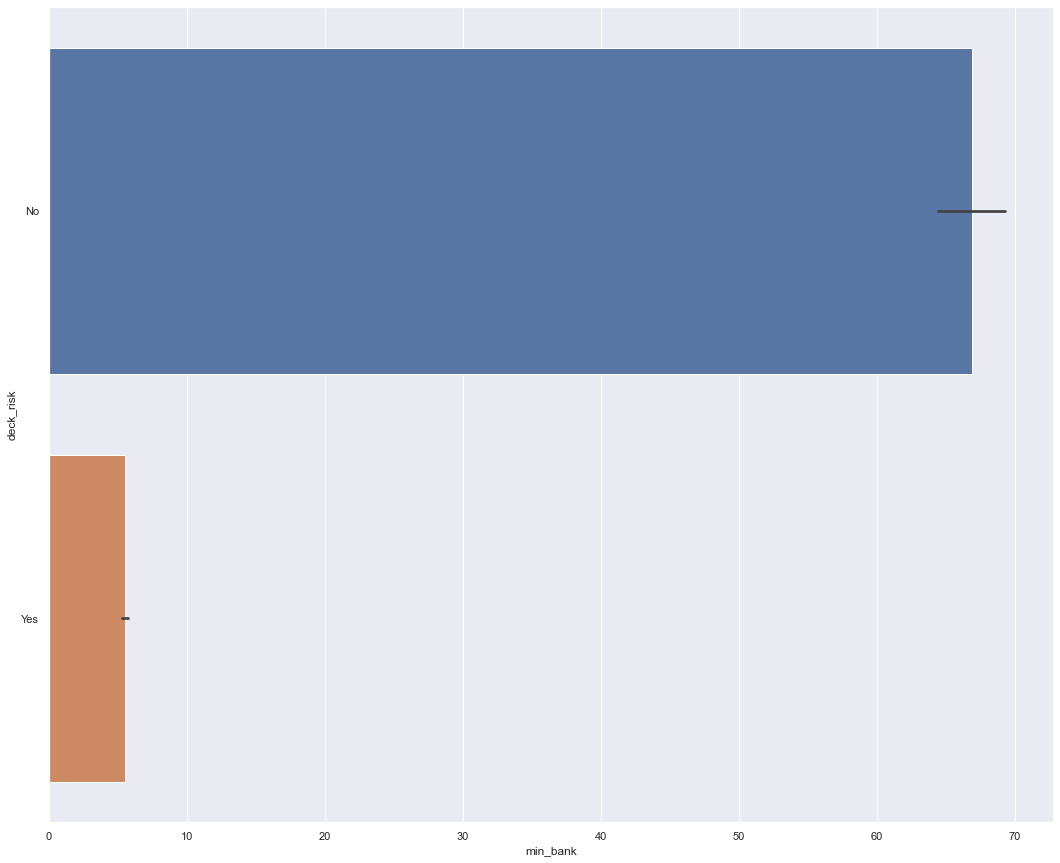

<Figure size 648x576 with 0 Axes>

In [24]:
ax = sns.barplot(x="min_bank", y="deck_risk", data=data)
plt.figure(figsize=(9, 8))

# Pre Processing 

In [25]:
train_df.isnull().sum()

# Lead Time has 100894 Missing Values

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [26]:
test_df.isnull().sum()

# Lead Time has 14725 Missing Values

sku                      0
national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
dtype: int64

In [27]:
train_df.isnull().sum()/len(train_df.index)*100

sku                  0.000000
national_inv         0.000059
lead_time            5.977625
in_transit_qty       0.000059
forecast_3_month     0.000059
forecast_6_month     0.000059
forecast_9_month     0.000059
sales_1_month        0.000059
sales_3_month        0.000059
sales_6_month        0.000059
sales_9_month        0.000059
min_bank             0.000059
potential_issue      0.000059
pieces_past_due      0.000059
perf_6_month_avg     0.000059
perf_12_month_avg    0.000059
local_bo_qty         0.000059
deck_risk            0.000059
oe_constraint        0.000059
ppap_risk            0.000059
stop_auto_buy        0.000059
rev_stop             0.000059
went_on_backorder    0.000059
dtype: float64

In [28]:
test_df.isnull().sum()/len(test_df.index)*100

sku                  0.000000
national_inv         0.000413
lead_time            6.082800
in_transit_qty       0.000413
forecast_3_month     0.000413
forecast_6_month     0.000413
forecast_9_month     0.000413
sales_1_month        0.000413
sales_3_month        0.000413
sales_6_month        0.000413
sales_9_month        0.000413
min_bank             0.000413
potential_issue      0.000413
pieces_past_due      0.000413
perf_6_month_avg     0.000413
perf_12_month_avg    0.000413
local_bo_qty         0.000413
deck_risk            0.000413
oe_constraint        0.000413
ppap_risk            0.000413
stop_auto_buy        0.000413
rev_stop             0.000413
dtype: float64

#Since Missing Values in Traning and Test Set are both 5.9% < 50-60% we will need to replace.

In [29]:
#Label Encoding for Target Variable

x=train_df['went_on_backorder']
le = LabelEncoder()
le.fit(x)

train_df['went_on_backorder'] = le.fit_transform(x)

In [30]:
train_df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,0
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,0
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,0
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,No,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,0
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,No,0.0,0.86,0.84,1.0,Yes,No,No,No,No,1
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,No,0.0,0.86,0.84,6.0,No,No,No,Yes,No,0
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,20.0,1.0,No,0.0,0.73,0.78,1.0,No,No,No,Yes,No,0


In [31]:
#Imputing Lead Time in Train & Test Data Set

#si_mean   = SimpleImputer(strategy = 'mean')

#train_df['lead_time'] = si_mean.fit_transform(train_df['lead_time'])


#test_df['lead_time'] = si_mean.fit_transform(test_df['lead_time'])

In [32]:
# Replacing NaN Values in Lead Time with Mean

values = {'lead_time': np.mean(train_df['lead_time'])}
values1 = {'lead_time': np.mean(test_df['lead_time'])}

In [33]:
train_df = train_df.fillna(value=values)
test_df = test_df.fillna(value=values1)

In [34]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,0
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,0
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,0
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0


In [35]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,0
1,1043384,2.0,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,0
2,1043696,2.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0
3,1043852,7.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,0
4,1044048,8.0,7.872267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,0


In [36]:
test_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,3285085,62.0,7.923018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No
1,3285131,9.0,7.923018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No
2,3285358,17.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No
3,3285517,9.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No
4,3285608,2.0,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No


# Feature  Engineering

In [37]:
#Drop SKU column
train_df = train_df.drop('sku', axis = 1)
test_df = test_df.drop('sku', axis = 1)

In [38]:
train_df.shape

(1687861, 22)

In [39]:
test_df.shape

(242076, 21)

In [40]:
#to obtain all numeric columns in train data set
numeric_train = [col for col in train_df.columns[:] if train_df[col].dtypes!='object']
print('numeric columns are:',numeric_train)
#to obtain all categorical columns in train data set
categorical_train = [col for col in train_df.columns if train_df[col].dtypes=='object']
print('categorical columns are:',categorical_train)

numeric columns are: ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty', 'went_on_backorder']
categorical columns are: ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


In [41]:
#to obtain all numeric columns in test data set
numeric_test = [col for col in test_df.columns[:] if test_df[col].dtypes!='object']
print('numeric columns are:',numeric_test)
#to obtain all categorical columns in test data set
categorical_test = [col for col in test_df.columns if test_df[col].dtypes=='object']
print('categorical columns are:',categorical_test)

numeric columns are: ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']
categorical columns are: ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


In [43]:
train_df = train_df[train_df.columns[train_df.columns.isin(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop','went_on_backorder'])]]
train_df = pd.concat([train_df,numeric_train],axis=1)
test_df = test_df[test_df.columns[test_df.columns.isin(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop'])]]
test_df = pd.concat([test_df,ntest],axis=1)
train_df.head(5)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

# Create pipes


In [ ]:
# 10.1 Instantiate Pipeline object for processing
#      cat data. Impute = most_frequent

pipe1  =  Pipeline(
                     [
                      ('mf', SimpleImputer(strategy='most_frequent')),
                      ('ohe', onehot())
                     ]
                   )

In [ ]:
pipe1.fit_transform(data[categorical_train])

In [ ]:
pipe2 = Pipeline([
                  ('impute', SimpleImputer(strategy = 'mean')),  # Impute object to impute numerical data
                  ('ss', StandardScaler())        # StandardScale object to normalize numerical data
                  ]
                 )

In [ ]:
pipe2.fit_transform(data[numeric_train])